In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from definitions import ROOT_DIR 

In [55]:
data_dir = Path(ROOT_DIR, 'ble_data')
agent = 'quantile'
all_eval_dirs = {
    'all': [f / 'eval' for f in (data_dir / 'features_all' / agent).iterdir()],
    'mean': [f / 'eval' for f in (data_dir / 'features_mean' / agent).iterdir()]
}
def moving_avg(x, mode='valid', w=10):
    return np.convolve(x, np.ones(w), mode=mode) / w

In [56]:
all_results = {}

# for each feature configuration
for feature, eval_dirs in all_eval_dirs.items():
    if feature not in all_results:
        all_results[feature] = { 'episodes': [], 'twr': [], 'cumulative_reward': [] }
    
    # for each seed
    for eval_dir in eval_dirs:
        
        run_results = { 'episodes': [], 'twr': [], 'cumulative_reward': [] }
        # for each checkpoint evaluation
        for res_path in eval_dir.iterdir():
            checkpoint_twr = []
            checkpoint_cum_rew = []
            with open(res_path) as f:
                data = json.load(f)
            
            run_results['episodes'].append(data[0]['seed'])
            
            # for each seed in the checkpoint evaluation
            for datum in data:
                checkpoint_twr.append(datum['time_within_radius'])
                checkpoint_cum_rew.append(datum['cumulative_reward'])
                
            run_results['twr'].append(np.stack(checkpoint_twr))
            run_results['cumulative_reward'].append(np.stack(checkpoint_cum_rew))
        
        all_results[feature]['episodes'].append(np.array(run_results['episodes']))
        all_results[feature]['twr'].append(np.stack(run_results['twr']))
        all_results[feature]['cumulative_reward'].append(np.stack(run_results['cumulative_reward']))
    
    for k, v in all_results[feature].items():
        all_results[feature][k] = np.stack(v)

In [57]:
all_to_plot = {}
indv_to_plot = {}
for feature, res in all_results.items():
    twr = res['twr']
    mean_over_eval_seeds = np.mean(twr, axis=-1)

    # we first do some smoothing
    smoothed_mean_over_eval_seeds = []
    for i in range(mean_over_eval_seeds.shape[0])
        smoothed_mean_over_eval_seeds.append(moving_avg())

    mean_over_seeds = np.mean(mean_over_eval_seeds, axis=0)
    std_err_over_seeds = np.std(mean_over_eval_seeds, axis=0) / mean_over_eval_seeds.shape[0]
    
    all_to_plot[feature] = {
        'x': np.arange(mean_over_eval_seeds.shape[1]) * 40, 'mean': mean_over_seeds, 'stderr': std_err_over_seeds
    }
    
    indv_to_plot[feature] = {
        'x': np.arange(mean_over_eval_seeds.shape[1]) * 40, 'indv': mean_over_eval_seeds, 'mean': mean_over_seeds
    }

plot_info = {
    'all': { 'color': 'blue', 'label': 'mean + variance' },
    'mean': { 'color': 'green', 'label': 'mean only' }

}

In [61]:
checkpoint_cum_rew

[86.46538104918751,
 315.2439225093063,
 88.3497228353958,
 945.9634200781753,
 141.12844312033567]

ValueError: 'y1' is not 1-dimensional

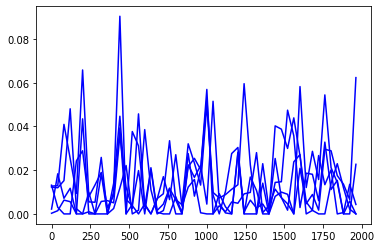

In [44]:
fig, ax = plt.subplots()

for feature, to_plot in all_to_plot.items():
    x = to_plot['x']
    means = to_plot['mean']
    stderr = to_plot['stderr']
    
    ax.plot(x, means, label=plot_info[feature]['label'], color=plot_info[feature]['color'])
    ax.fill_between(x, means - stderr, means + stderr,
                         color=plot_info[feature]['color'], alpha=0.2)

ax.set_xlabel('Episodes')
ax.set_title('BLE all features vs mean only, 10 seeds mean and std err')
ax.set_ylabel(f"TWR50", rotation=0, labelpad=65)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

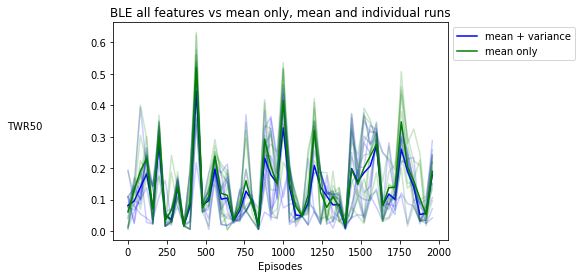

In [41]:
fig, ax = plt.subplots()

for feature, to_plot in indv_to_plot.items():
    x = to_plot['x']
    means = to_plot['mean']
    
    ax.plot(x, means, label=plot_info[feature]['label'], color=plot_info[feature]['color'])
    
    for indv in to_plot['indv']:
        ax.plot(x, indv, color=plot_info[feature]['color'], alpha=0.2)


ax.set_xlabel('Episodes')
ax.set_title('BLE all features vs mean only, mean and individual runs')
ax.set_ylabel(f"TWR50", rotation=0, labelpad=65)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

In [34]:
twr[0, -2, 0], twr[1, -2, 0]

(0.10416666666666667, 0.234375)